# ✅ Phase 5 — Propositions de solutions

Ce notebook propose et simule différents scénarios climatiques pour observer leurs effets sur les émissions de CO₂, la température et les catastrophes naturelles (France vs Inde).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargement des données combinées
df = pd.read_csv("donnees_climatiques_combinees.csv")
df.head()

,année,pays,anomalie_temp,precipitations_mm,co2_emis,nb_catastrophes
0,1970,France,0.038083,785.6,461.338,3.0
1,1971,France,-0.068083,849.7,494.427,NaN
2,1972,France,-0.298667,839.3,514.988,2.0
3,1973,France,-0.028583,932.1,539.772,4.0
4,1974,France,0.112750,856.1,521.906,1.0


## 🔹 Scénarios de réchauffement climatique (1.5°C, 2°C, 3°C)

In [2]:
# Hypothèse simplifiée : proportionnalité linéaire entre température et catastrophes
max_temp = df['anomalie_temp'].max()
df['catastrophes_1.5C'] = df['nb_catastrophes'] * (1.5 / max_temp)
df['catastrophes_2C'] = df['nb_catastrophes'] * (2.0 / max_temp)
df['catastrophes_3C'] = df['nb_catastrophes'] * (3.0 / max_temp)

## 🔹 Transition énergétique (80% renouvelables => -50% CO₂)

In [3]:
df['co2_transition'] = df['co2_emis'] * 0.5

## 🔹 Reforestation (absorption de 100 Mt de CO₂/an)

In [4]:
absorption = 100  # Mt
df['co2_net_reforestation'] = df['co2_emis'] - absorption

## 🔹 Sobriété énergétique (baisse de 15% consommation CO₂)

In [5]:
df['co2_sobriete'] = df['co2_emis'] * 0.85

## 📊 Visualisation : Émissions de CO₂ — scénario France vs Inde

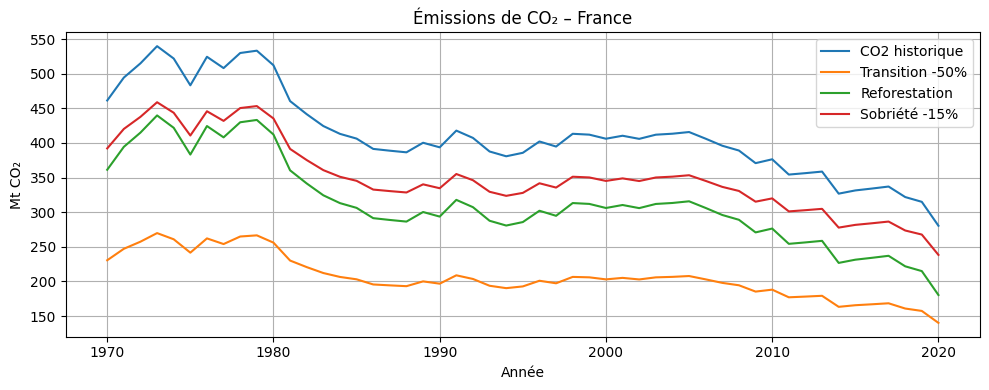

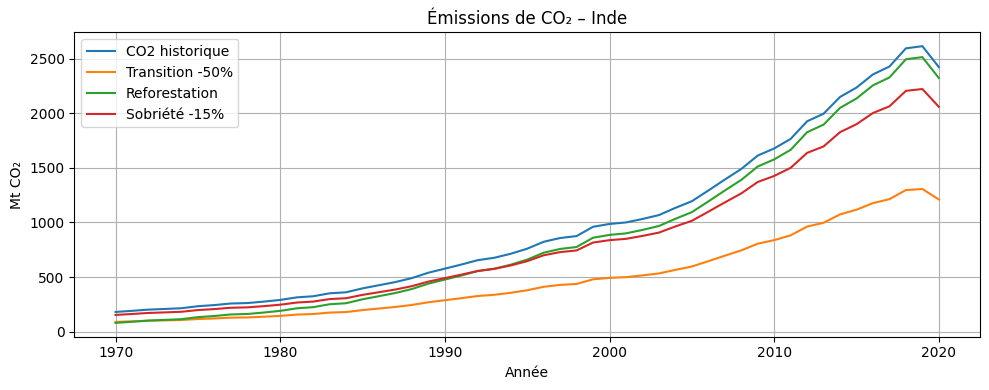

In [6]:
for pays in df['pays'].unique():
    dfp = df[df['pays'] == pays]
    plt.figure(figsize=(10, 4))
    plt.plot(dfp['année'], dfp['co2_emis'], label='CO2 historique')
    plt.plot(dfp['année'], dfp['co2_transition'], label='Transition -50%')
    plt.plot(dfp['année'], dfp['co2_net_reforestation'], label='Reforestation')
    plt.plot(dfp['année'], dfp['co2_sobriete'], label='Sobriété -15%')
    plt.title(f"Émissions de CO₂ – {pays}")
    plt.xlabel("Année")
    plt.ylabel("Mt CO₂")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()